In [3]:
# !pip install scikit-learn
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [4]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
weights = [87,81,82,92,90,61,86,66,69,69]
heights = [187,174,179,192,188,160,179,168,168,174]
print(len(weights))
print(len(heights))

10
10


In [6]:
# 딕셔너리 형태로 데이터 생성
body_df = pd.DataFrame({'height': heights, 'weight': weights})

# 상위 3개 데이터만 출력
body_df.head(3)


height  weight
0     187      87
1     174      81
2     179      82

Text(0, 0.5, 'height(cm)')

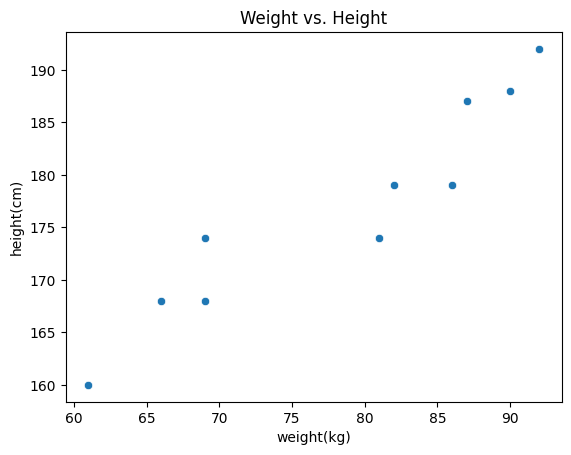

In [7]:
#weight와 height간의 산점도
sns.scatterplot(data = body_df, x ='weight', y='height' )
plt.title('Weight vs. Height')
plt.xlabel('weight(kg)')
plt.ylabel('height(cm)')

In [8]:
#선형회귀 훈련(적합)
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
type(model_lr)

sklearn.linear_model._base.LinearRegression

In [9]:
# DataFrame[]: Series(데이터 프레임의 컬럼)
# DaraFream[[]]: DataFrame

x = body_df[['weight']]
y = body_df[['height']]

In [10]:
x.head(3)

weight
0      87
1      81
2      82

In [11]:
y.head(3)

height
0     187
1     174
2     179

In [12]:
#데이터 훈련
model_lr.fit(X = x, y = y)

LinearRegression()

In [13]:
# 가중치(w1)
print(model_lr.coef_)
# 편향(bias,w0)
print(model_lr.intercept_)

[[0.86251245]]
[109.36527488]


In [14]:
w1 = model_lr.coef_[0][0]
w0 = model_lr.intercept_[0]

In [15]:
print('y= {}x + {}'.format(w1.round(2),w0.round(2)))

#.round(2) 소수점 2번째 자리까지 표시시

y= 0.86x + 109.37


y(height)는 x(몸무게)에 0.86을 곱한뒤 109.37을 더하면 된다.

1. 구글링 -> 블로그
 단점은 늘 블로그가 바뀌고, 형태가 일정하지 않음

2. chatgpt
 단점은 의존하게 되면 더이상 공부를 안하고 거짓된 정보를 전달할 수 있음

3. 공식문서
 장점은 일관되게 정리되어 있어서 동일한 위치에 똑같은 문서가 저장되어 있음
 자격증: 공식문서만 열람할 수 있음
 단점은 읽기 어려움

In [16]:
help(sklearn.linear_model.LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |      speedu

y = 0.86x + 109.37
를 활용하여 예측 컬럼을 추가
에러값을 각각 계산
양수를 만들기 위해 제곱 -> 모두 값을 더함(MSE)

In [17]:
body_df.head(3)

height  weight
0     187      87
1     174      81
2     179      82

In [18]:
# 예측값을 만들기 [pred]
body_df['pred'] = body_df['weight']*w1 + w0
body_df.head(3)

height  weight        pred
0     187      87  184.403858
1     174      81  179.228784
2     179      82  180.091296

In [19]:
# 에러값 계산(실제값-예측값) [error]
body_df['error'] = body_df['height']-body_df['pred']
body_df.head(3)

height  weight        pred     error
0     187      87  184.403858  2.596142
1     174      81  179.228784 -5.228784
2     179      82  180.091296 -1.091296

In [20]:
body_df['error^2'] = body_df['error']**2
body_df.head(3)

height  weight        pred     error    error^2
0     187      87  184.403858  2.596142   6.739951
1     174      81  179.228784 -5.228784  27.340178
2     179      82  180.091296 -1.091296   1.190927

In [21]:
#MES 계산 답: 10
body_df['error^2'].sum()/len(body_df)

np.float64(10.152939045376309)

-산점도 그래프에 선형식을 만들어서 그래프로 그리기

<Axes: xlabel='weight', ylabel='height'>

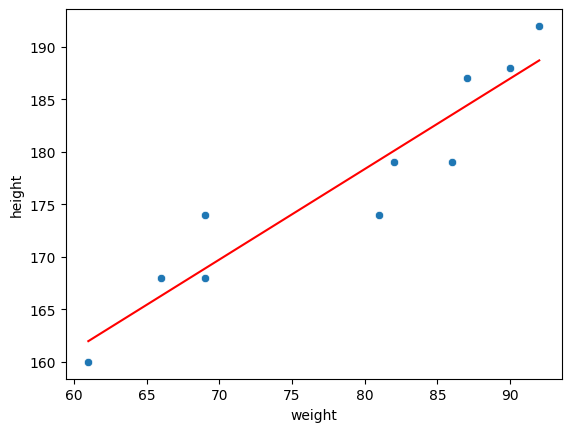

In [22]:
sns.scatterplot(data = body_df, x = 'weight', y = 'height')
sns.lineplot(data = body_df, x = 'weight', y = 'pred', color = 'red')

선형회귀 모델 평가
-회귀(숫자를 맞추는 방법) : MSE(수동계산은 10)
-R Square: 평균대비 설명력, 0이면 제일 낮음, 1일 수록 높음

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [24]:
from sklearn.metrics import mean_squared_error, r2_score


In [25]:
# 평가함수는 공통적으로 정답(실제 true), 예측값(pred)
y_true = body_df['height']
y_pred = body_df['pred']
mean_squared_error(y_true,y_pred)

10.152939045376309

In [26]:
r2_score(y_true,y_pred)

0.8899887415172141

In [27]:
# 예측값 알아내는 또다른 코드 predict()
y_pred2 = model_lr.predict(body_df[['weight']])
y_pred2

array([[184.40385835],
       [179.22878362],
       [180.09129608],
       [188.71642061],
       [186.99139571],
       [161.97853455],
       [183.54134589],
       [166.29109682],
       [168.87863418],
       [168.87863418]])

In [28]:
mean_squared_error(y_true,y_pred2)

10.152939045376309

-Seaborn 시각화 라이블리는 기본적으로 데이터셋을 제공

In [32]:
tips_df = sns.load_dataset('tips')
tips_df.head(3)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

In [ ]:
# total_bill과 tip이 연관이 있다고 생각
# x: total_bill
# y: tip
#으로 설정정

In [34]:
#model_lr은 위 키와 몸무게에서 사용했으므로 tip에 대해서는 model_lr2로 설정

model_lr2 = LinearRegression()
x = tips_df[['total_bill']]
y = tips_df[['tip']]
model_lr2.fit(x,y)

LinearRegression()

<Axes: xlabel='total_bill', ylabel='tip'>

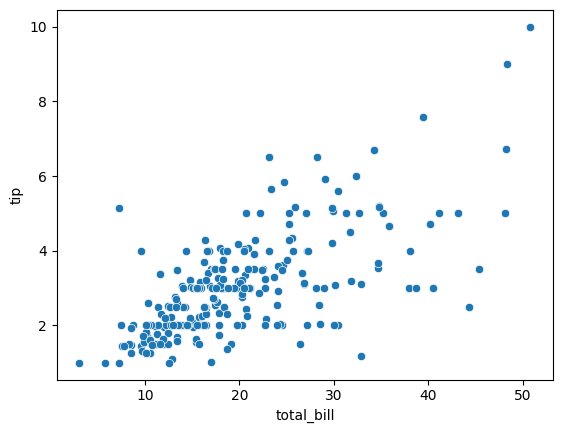

In [35]:
sns.scatterplot(data = tips_df, x= tips_df['total_bill'], y=tips_df['tip'])

In [36]:
# y(tip) = w1*x(totall_bill) + w0
w1_tip = model_lr2.coef_[0][0]
w0_tip = model_lr2.intercept_[0]

In [37]:
print('y = {}x + {}'.format(w1_tip.round(2),w0_tip.round(2)))

y = 0.11x + 0.92


전체 결제금액이 1달러 오를 때 팁은 0.11달러씩 추가된다.
100달러 오를 때, 팁은 11달러 씩 추가된다.

In [50]:
# 예측값 생성
y_true_tip = tips_df['tip']
y_pred_tip = model_lr2.predict(tips_df[['total_bill']])

#y_pred_tip도 tips_df에 컬럼으로 넣어주기
tips_df['pred'] = y_pred_tip 


In [43]:
y_true_tip[:5]

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [44]:
y_pred_tip[:5]

array([[2.70463616],
       [2.00622312],
       [3.12683472],
       [3.40725019],
       [3.5028225 ]])

In [46]:
mean_squared_error(y_true_tip, y_pred_tip)

1.036019442011377

In [47]:
r2_score(y_true_tip, y_pred_tip)

# 45%정도는 상당히 낮은 확률이므로 그렇게 좋은 데이터는 아니다!

0.45661658635167657

<Axes: title={'center': 'Total_bill VS. Tip'}, xlabel='total_bill', ylabel='tip'>

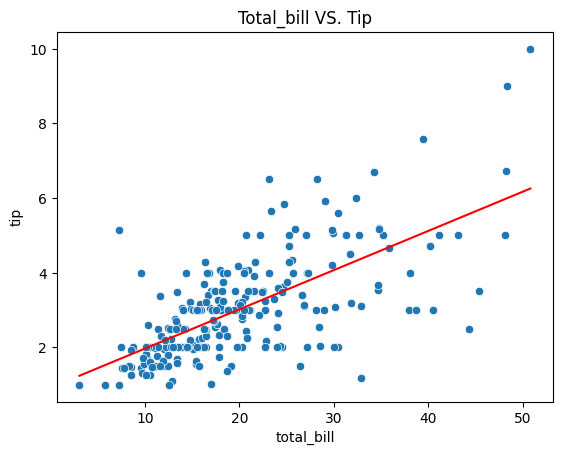

In [54]:
#시각화
sns.scatterplot(data = tips_df, x= tips_df['total_bill'], y=tips_df['tip'])
plt.title('Total_bill VS. Tip')
sns.lineplot(data = tips_df, x = 'total_bill', y = 'pred', color = 'red')

-선형회귀
단순선형회귀: x 변수가 1개
다중선형회귀: x 변수가 2개 이상